In [126]:
!pip install yfinance
!pip install matplotlib_venn

In [1]:
import numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
import hvplot.pandas
from matplotlib_venn import venn3
from matplotlib.sankey import Sankey
import yfinance as yf
from datetime import datetime, date
#Fix this csv read below to go the right direction without being absolute
df = pd.read_csv('../bulk_output.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27851 entries, 0 to 27850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Representative   27851 non-null  object 
 1   BioGuideID       27851 non-null  object 
 2   TransactionDate  27851 non-null  object 
 3   Ticker           27851 non-null  object 
 4   Transaction      27851 non-null  object 
 5   Range            27851 non-null  object 
 6   House            27851 non-null  object 
 7   Amount           27851 non-null  float64
 8   Party            27851 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.9+ MB


In [2]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27851 entries, 0 to 27850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Representative   27851 non-null  object        
 1   BioGuideID       27851 non-null  object        
 2   TransactionDate  27851 non-null  datetime64[ns]
 3   Ticker           27851 non-null  object        
 4   Transaction      27851 non-null  object        
 5   Range            27851 non-null  object        
 6   House            27851 non-null  object        
 7   Amount           27851 non-null  float64       
 8   Party            27851 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.9+ MB


In [3]:
#Create new dataframes for purchases and sales
df_purchase = df.query('Transaction ==  "Purchase"')
df_sale = df.query('Transaction ==  "Sale"')
#Print  the first 5 rows of each dataframe
print(df_purchase.head())
print(df_sale.head())

               Representative BioGuideID TransactionDate  Ticker Transaction  \
0              Rudy Yakym Iii    Y000067      2024-09-26  MATURE    Purchase   
1  Marjorie Taylor Mrs Greene    G000596      2024-09-20    GOOG    Purchase   
2  Marjorie Taylor Mrs Greene    G000596      2024-09-20    CRWD    Purchase   
3  Marjorie Taylor Mrs Greene    G000596      2024-09-20      BX    Purchase   
4  Marjorie Taylor Mrs Greene    G000596      2024-09-20    LRCX    Purchase   

              Range            House  Amount Party  
0  $1,001 - $15,000  Representatives  1001.0     R  
1  $1,001 - $15,000  Representatives  1001.0     R  
2  $1,001 - $15,000  Representatives  1001.0     R  
3  $1,001 - $15,000  Representatives  1001.0     R  
4  $1,001 - $15,000  Representatives  1001.0     R  
        Representative BioGuideID TransactionDate Ticker Transaction  \
11  William R. Keating    K000375      2024-09-11    CAT        Sale   
12  William R. Keating    K000375      2024-09-11   NXPI 

In [4]:
#Finding out the top 20 most tickers.
top_20_bought = df_purchase['Ticker'].value_counts().nlargest(20)
top_20_sold = df_sale['Ticker'].value_counts().nlargest(20)
top_20 = df['Ticker'].value_counts().nlargest(20)
print(top_20_bought, top_20_sold, top_20)

Ticker
MSFT     278
AAPL     190
NVDA     130
AMZN     124
DIS       89
BRK.B     88
GOOG      81
HD        80
JNJ       80
TSLA      79
T         73
V         71
JPM       70
PYPL      68
PG        63
KO        62
XOM       61
COST      61
SBUX      61
ACN       59
Name: count, dtype: int64 Ticker
MSFT     251
AAPL     197
NVDA      93
TSLA      86
RUN       86
AMZN      82
XOM       77
FB        77
GOOG      67
UNH       66
BRK.B     66
SBUX      62
DIS       61
GOOGL     58
BABA      58
JPM       56
PYPL      56
VZ        56
PFE       55
JNJ       54
Name: count, dtype: int64 Ticker
MSFT     584
AAPL     450
NVDA     241
AMZN     219
DIS      176
TSLA     175
BRK.B    166
PYPL     166
GOOG     157
XOM      157
JNJ      147
T        146
FB       141
JPM      139
SBUX     130
V        130
HD       128
INTC     124
UNH      122
VZ       117
Name: count, dtype: int64


Purchased only: PG, ACN, KO, COST
Sold only: PFE, BABA, GOOGL, RUN
Most Frequent only: INTC
Purchased and Sold: 
Purchased and Most Frequent: HD, T, V
Sold and Most Frequent: VZ, FB, UNH
Purchased, Sold, and Most Frequent: BRK.B, SBUX, PYPL, JPM, GOOG, TSLA, NVDA, AMZN, XOM, JNJ, AAPL, DIS, MSFT


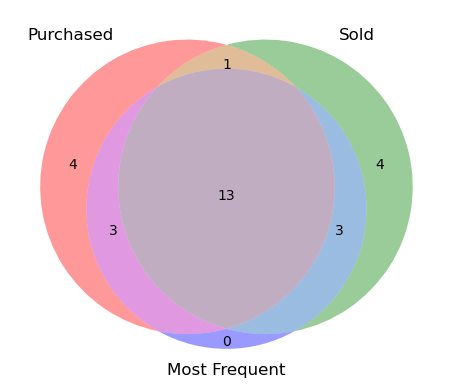

In [5]:
#I want to know the crossover between these three different sets of data
#Creating subsets to display that crossover, and displaying them in  a venn diagram


# Define the sets
top_20_purchased_set = set(top_20_bought.index)
top_20_sold_set = set(top_20_sold.index)
top_20_set = set(top_20.index)

# Calculate the subsets
purchased_only = top_20_purchased_set - top_20_sold_set - top_20_set
sold_only = top_20_sold_set - top_20_purchased_set - top_20_set
frequent_only = top_20_set - top_20_purchased_set - top_20_sold_set
purchased_sold = top_20_purchased_set.intersection(top_20_sold_set) - top_20_set
purchased_frequent = top_20_purchased_set.intersection(top_20_set) - top_20_sold_set
sold_frequent = top_20_sold_set.intersection(top_20_set) - top_20_purchased_set
p_s_f = top_20_purchased_set.intersection(top_20_sold_set).intersection(top_20_set)

# Print the ticker names for each subset
print("Purchased only:", ', '.join(list(purchased_only)))
print("Sold only:", ', '.join(list(sold_only)))
print("Most Frequent only:", ', '.join(list(frequent_only)))
print("Purchased and Sold:", ', '.join(list(purchased_sold)))
print("Purchased and Most Frequent:", ', '.join(list(purchased_frequent)))
print("Sold and Most Frequent:", ', '.join(list(sold_frequent)))
print("Purchased, Sold, and Most Frequent:", ', '.join(list(p_s_f)))

# Create the Venn diagram
venn3(subsets=(len(purchased_only), len(sold_only), len(frequent_only), len(purchased_sold), len(purchased_frequent), len(sold_frequent), len(p_s_f)), set_labels=('Purchased', 'Sold', 'Most Frequent'))

# Show the plot
plt.show()

In [6]:
#I am only going to want the top five stocks to make data cleaner
top_5 = df[df['Ticker'].isin(p_s_f)]['Ticker'].value_counts().nlargest(5)
print(top_5)

Ticker
MSFT    584
AAPL    450
NVDA    241
AMZN    219
DIS     176
Name: count, dtype: int64


In [7]:
#Chart out purchases over times
#Filtering Data


In [8]:
# Find out big purchase dates and big sales dates
# For purchases
top_5_purchase_days = df[df['Transaction'] == 'Purchase'].groupby('TransactionDate').size().sort_values(ascending=False).head(5)
top_5_purchase_days.index = pd.to_datetime(top_5_purchase_days.index)

print("Top 5 most active purchase days:")
print(top_5_purchase_days)
print("\n")

# For sales
top_5_sale_days = df[df['Transaction'] == 'Sale'].groupby('TransactionDate').size().sort_values(ascending=False).head(5)
top_5_sale_days.index = pd.to_datetime(top_5_sale_days.index)

print("Top 5 most active sale days:")
print(top_5_sale_days)

Top 5 most active purchase days:
TransactionDate
2020-03-18    196
2020-04-02    105
2023-11-10    103
2023-09-26     96
2022-07-27     72
dtype: int64


Top 5 most active sale days:
TransactionDate
2023-07-10    324
2019-03-25    252
2019-06-24    211
2021-02-16    166
2023-07-12    147
dtype: int64


[*********************100%***********************]  5 of 5 completed


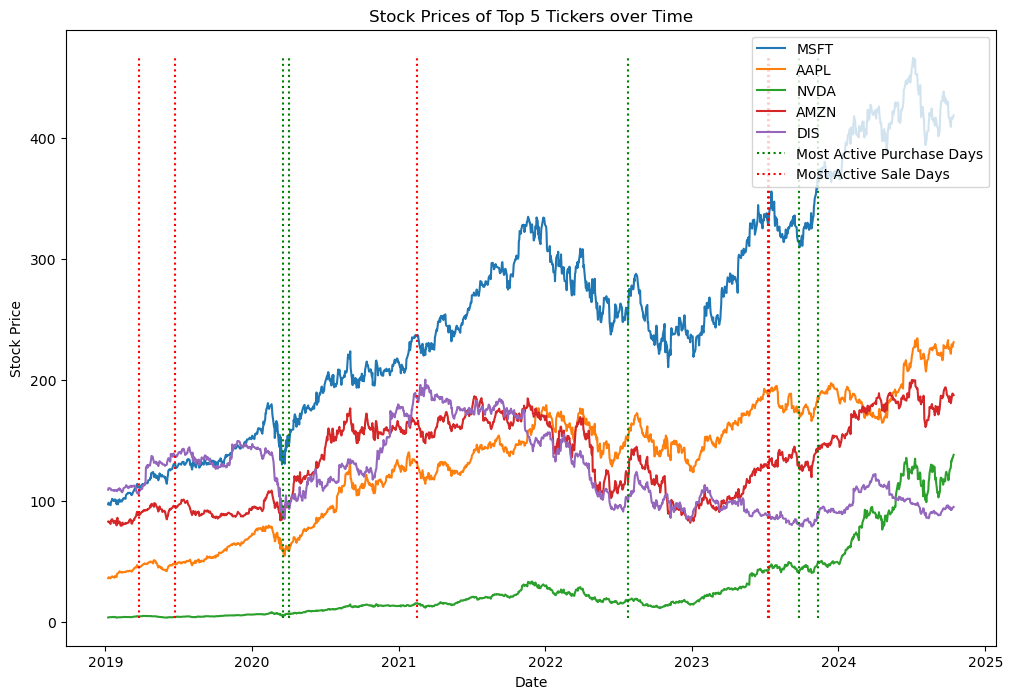

In [9]:
# Define the top 5 tickers
top_5_tickers = top_5.index.tolist()

# Define the date range
start_date = '2019-01-08'
end_date = date.today().strftime('%Y-%m-%d')

# Download the historical price data for the top 5 tickers using yfinance
data = yf.download(top_5_tickers, start=start_date, end=end_date)['Adj Close']

# Plot the stock prices over time
fig, ax = plt.subplots(figsize=(12, 8))
for ticker in top_5_tickers:
    ax.plot(data.index, data[ticker], label=ticker)

# Add vertical markers for the most active purchase and sale days with dotted lines
ax.vlines(top_5_purchase_days.index, ymin=data.min().min(), ymax=data.max().max(), color='g', linestyle=':', label='Most Active Purchase Days')
ax.vlines(top_5_sale_days.index, ymin=data.min().min(), ymax=data.max().max(), color='r', linestyle=':', label='Most Active Sale Days')

ax.set_title('Stock Prices of Top 5 Tickers over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.legend(loc='upper right')
plt.show()